In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score

## Classification

In [2]:
x_clf, y_clf = make_classification(n_samples=1000, n_features=20, random_state=42)

In [3]:
df_clf = pd.DataFrame(x_clf, columns=[f"Feature {i}" for i in range(x_clf.shape[1])])
df_clf['Target'] = y_clf

In [4]:
x_clf = df_clf.drop("Target", axis=1)
y_clf = df_clf["Target"]

In [5]:
df_clf

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Target
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643,1
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199,1
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,...,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325,0
996,-0.410935,-0.546608,1.134924,0.334300,-0.618983,0.693425,-0.617285,1.087727,0.193022,1.461993,...,-1.011037,-0.256734,0.517721,0.593266,-0.629825,-0.080137,-0.246737,-0.486387,2.211333,1
997,-0.200135,-1.461082,1.797017,-0.244096,0.544323,1.776031,-2.021994,-0.658113,0.206816,-0.114789,...,0.542985,-0.420264,-0.748275,1.668697,-1.209965,-1.248582,-1.502802,-1.274737,1.601119,1
998,0.039356,0.248684,-0.475323,-1.136693,1.942577,-1.297109,-0.802722,0.451323,-1.454615,-0.679222,...,0.153528,0.637119,1.235484,0.780224,1.558384,0.263888,0.099126,0.542692,1.208275,0


In [6]:
x_clf_train, x_clf_test, y_clf_train, y_clf_test = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42)

In [7]:
clf_model = RandomForestClassifier(random_state=42)

In [8]:
clf_model.fit(x_clf_train, y_clf_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [9]:
y_clf_pred = clf_model.predict(x_clf_test)

In [10]:
before_fi_score_clf = accuracy_score(y_clf_test, y_clf_pred)

In [11]:
before_fi_score_clf

0.9

In [12]:
clf_model.feature_importances_

array([0.01695078, 0.10181962, 0.02108998, 0.01368187, 0.01554572,
       0.36313417, 0.02333904, 0.01519547, 0.01549653, 0.0158737 ,
       0.01915803, 0.02569037, 0.01922067, 0.01651946, 0.07557534,
       0.01734487, 0.01852994, 0.01427792, 0.17725206, 0.01430447])

In [13]:
feature_importance_df_clf = pd.DataFrame({
    "Feature" : x_clf.columns,
    "Importance" : clf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [14]:
top_10_clf = feature_importance_df_clf.head(10)

In [15]:
top_10_clf

,Feature,Importance
5,Feature 5,0.363134
18,Feature 18,0.177252
1,Feature 1,0.101820
14,Feature 14,0.075575
11,Feature 11,0.025690
6,Feature 6,0.023339
2,Feature 2,0.021090
12,Feature 12,0.019221
10,Feature 10,0.019158
16,Feature 16,0.018530


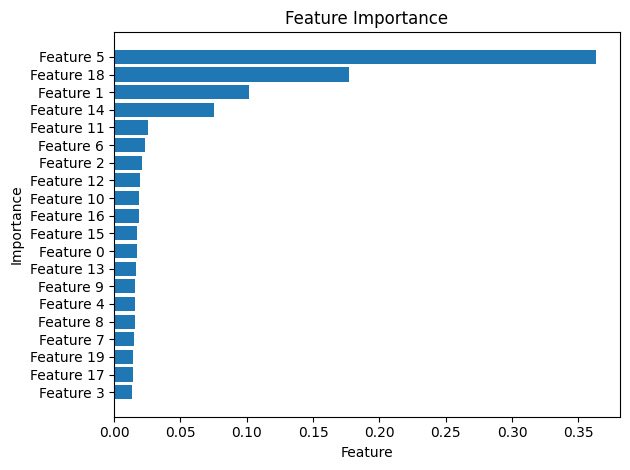

In [16]:
plt.barh(
    feature_importance_df_clf["Feature"],
    feature_importance_df_clf["Importance"]
)
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [17]:
least_imp_clf = feature_importance_df_clf.tail(5)['Feature']

In [18]:
least_imp_clf

8      Feature 8
7      Feature 7
19    Feature 19
17    Feature 17
3      Feature 3
Name: Feature, dtype: str

In [19]:
x_clf_train_reduced = x_clf_train.drop(columns=least_imp_clf)
x_clf_test_reduced = x_clf_test.drop(columns=least_imp_clf)

In [20]:
clf_model_reduced = RandomForestClassifier(random_state=42)

In [21]:
clf_model_reduced.fit(x_clf_train_reduced, y_clf_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [22]:
y_clf_pred_reduced = clf_model_reduced.predict(x_clf_test_reduced)

In [23]:
after_fi_score_clf = accuracy_score(y_clf_test, y_clf_pred_reduced)

In [24]:
before_fi_score_clf, after_fi_score_clf

(0.9, 0.905)

## Regression

In [25]:
x_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)

In [26]:
df_reg = pd.DataFrame(x_reg, columns=[f"Feature {i}" for i in range(x_reg.shape[1])])
df_reg['Target'] = y_reg

In [27]:
df_reg

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Target
0,-1.684004,-0.266213,1.562265,0.856048,0.920510,0.649093,-1.272238,0.816081,0.250514,-1.086636,...,-0.709029,-1.297164,0.713026,1.176344,-0.663092,0.102814,2.945246,0.452874,0.925966,253.620027
1,-0.695810,-0.097621,-0.395067,-0.775379,-0.361087,-0.682935,-1.327507,1.784559,-0.328725,-0.077285,...,-0.159329,2.202243,-0.501177,-0.165424,-1.406811,2.374466,-0.076188,-0.546548,1.228572,-28.115453
2,1.573136,-0.509567,0.156899,0.030284,-0.446727,-1.049674,0.065931,0.433046,1.370963,0.863827,...,1.545226,-1.396229,-2.655082,0.313238,-2.401947,0.597473,-0.849281,-0.778740,-2.843944,-311.731378
3,-0.403288,0.493977,-0.600386,-1.081914,0.308292,-0.157838,-1.209199,0.910216,0.073337,1.416412,...,0.084527,0.741822,0.056742,-0.183528,0.968770,0.773240,0.139654,0.967178,-0.362348,194.538814
4,0.936056,0.702660,-0.719990,0.124286,-2.707544,0.864248,-0.652950,0.030476,-1.253506,0.833158,...,0.776937,-0.665693,-0.549789,-0.897253,-0.214955,-0.630249,-0.924063,0.385750,0.240877,-279.409559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.381592,-0.565393,0.720997,-0.978588,-2.123948,-1.493510,-0.300980,-2.223574,2.927270,0.358345,...,-1.798215,-0.470203,-0.631437,-0.518069,-0.994355,-1.196558,-0.545186,-0.921451,0.243135,-508.390219
996,1.711029,-0.168259,-0.564196,-1.047158,0.047825,-1.006927,-0.104968,-0.399900,1.255146,-0.951184,...,0.523961,-1.746467,0.612791,-0.745168,-0.497673,-0.341822,-1.494038,-1.268137,0.068372,-276.196905
997,-0.385493,-0.737737,0.309727,0.660460,-1.680870,0.034272,-0.854493,1.167742,0.589639,-3.221016,...,-2.071377,0.741074,-0.403066,-0.775045,-2.651828,0.395599,0.475752,1.366389,0.686568,-284.646193
998,-0.206985,-0.726742,-0.895354,-0.872989,0.349924,-1.133421,0.551964,0.822350,2.337828,-0.587856,...,-1.031025,-1.265258,-0.344098,-0.836980,-0.860757,0.230611,1.062854,0.534208,1.040954,-148.379007


In [28]:
x_reg = df_reg.drop("Target", axis=1)
y_reg = df_reg["Target"]

In [29]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

In [30]:
reg_model = RandomForestRegressor()

In [31]:
reg_model.fit(x_reg_train, y_reg_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [32]:
y_reg_pred = reg_model.predict(x_reg_test)

In [33]:
before_fi_score_reg = r2_score(y_reg_test, y_reg_pred)

In [34]:
before_fi_score_reg

0.7666305389254786

In [35]:
reg_model.feature_importances_

array([0.00713194, 0.01712572, 0.10389686, 0.00638179, 0.202557  ,
       0.12207277, 0.00827526, 0.00809859, 0.00778966, 0.00860066,
       0.00991347, 0.00941771, 0.00836681, 0.00769409, 0.00869277,
       0.13631839, 0.2848525 , 0.00963695, 0.02487356, 0.00830351])

In [36]:
feature_importance_df_reg = pd.DataFrame({
    "Feature" : x_reg.columns,
    "Importance" : reg_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [37]:
top_10_reg = feature_importance_df_reg.head(10)

In [38]:
top_10_reg

,Feature,Importance
16,Feature 16,0.284852
4,Feature 4,0.202557
15,Feature 15,0.136318
5,Feature 5,0.122073
2,Feature 2,0.103897
18,Feature 18,0.024874
1,Feature 1,0.017126
10,Feature 10,0.009913
17,Feature 17,0.009637
11,Feature 11,0.009418


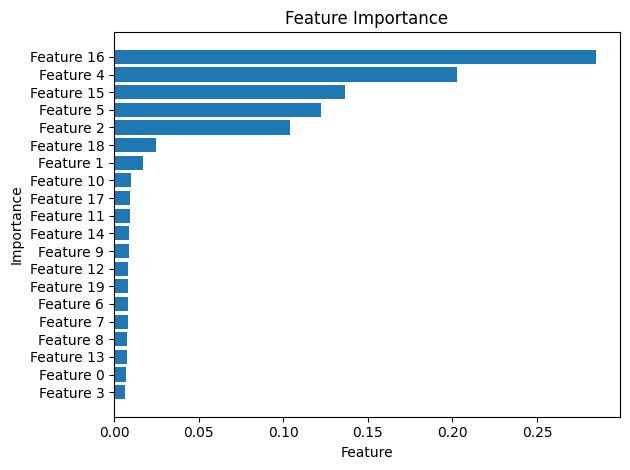

In [39]:
plt.barh(
    feature_importance_df_reg["Feature"],
    feature_importance_df_reg["Importance"]
)
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [40]:
least_imp_reg = feature_importance_df_reg.tail(5)['Feature']

In [41]:
x_reg_train_reduced = x_reg_train.drop(columns=least_imp_reg)
x_reg_test_reduced = x_reg_test.drop(columns=least_imp_reg)

In [42]:
reg_model_reduced = RandomForestRegressor()

In [43]:
reg_model_reduced.fit(x_reg_train_reduced, y_reg_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [44]:
y_reg_pred_reduced = reg_model_reduced.predict(x_reg_test_reduced)

In [45]:
after_fi_score_reg = r2_score(y_reg_test, y_reg_pred_reduced)

In [46]:
before_fi_score_reg, after_fi_score_reg

(0.7666305389254786, 0.7841002936240906)